# <a name='topic'>Project Topic</a>

## Customer Segmentation for Online Retail Company
#
#### Goal:
Goal is to use unsupervised machine learning, to build a clustering model for customer segmentation based on similarity between transactions. I will also perform some exploratory analysis on data to identify important feature.

#
#### Type of Task and Algorithms Used:
It is a clustering task to segment customers into groups. I will be using K-means and Hierarchical clustering algorithms for it.

## Data
#### Data Source:
This dataset has been referred from UCI ML Repository: https://archive.ics.uci.edu/ml/datasets/online+retail

#### Context:
This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

#### Data Description
Data has total 541909 observations with 8 variables or features of the online purchase history of 2.4k customers.

Data size: 45 MB
Feature Description:
- InvoiceNo: This column likely contains a unique identifier or code for each retail invoice or transaction. It helps in tracking and identifying individual sales transactions.

- StockCode: This column likely contains a code or identifier for the specific product or item being sold in each transaction. It allows the association of products with their respective transactions.

- Description: This column probably contains a textual description or name of the product or item being sold. It provides more detailed information about the product.

- Quantity: This column likely represents the quantity of the product or item that was sold in each transaction. It indicates how many units of the product were purchased.

- InvoiceDate: This column probably records the date and time when each retail invoice or transaction occurred. It provides a timestamp for when the sale took place.

- UnitPrice: This column contains the price per unit of the product or item being sold. It represents the cost of one unit of the product.

- CustomerID: This column likely contains a unique identifier or code for each customer who made a purchase. It allows tracking of customer-specific transactions.

- Country: This column contains the name or code of the country where the customer who made the purchase is located. It provides geographic information about the customers.

## Import all required libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
# import plotly.express as px

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

## Data Cleaning

### 1. Import data

In [42]:
df = pd.read_csv('./data/Online-Retail.csv')

### 2. Get overview of the data

In [43]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/10 8:26,3.39,17850.0,United Kingdom


In [44]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09/12/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09/12/11 12:50,4.95,12680.0,France


In [45]:
df.shape

(541909, 8)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [47]:
df.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### 3. Inspect null values

In [48]:
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']

for c in df.columns:
    string_null = np.array([x in a[2:] for x in df[c]])
    print(c, df[c].isnull().sum(), string_null.sum())

InvoiceNo 0 0
StockCode 0 0
Description 1454 47
Quantity 0 0
InvoiceDate 0 0
UnitPrice 0 0
CustomerID 135080 0
Country 0 0


We can see that:
 - the 'Description' column has 47 string-typed null/none values and 1454 null values.
 - the 'CustomerID' column has 135080 null values.

Let's find out what are the string-typed null/none values in 'Description'

In [49]:
for x in df['Description']:
    if x in a[2:]:
        print(x, a.index(x))

? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9
? 9


We can see that we have space '?' question mark in Description.
Let's replace space with null.

In [50]:
df['Description'] = df['Description'].replace('?', np.nan, regex=False)

Verify we don't have any string-typed null values anymore

In [51]:
for c in df.columns:
    string_null = np.array([x in a[2:] for x in df[c]])
    print(c, df[c].isnull().sum(), string_null.sum())

InvoiceNo 0 0
StockCode 0 0
Description 1501 0
Quantity 0 0
InvoiceDate 0 0
UnitPrice 0 0
CustomerID 135080 0
Country 0 0


### 4. Dropping missing data rows

Let's find out percentage of missing values by columns

In [52]:
# Calculating the Missing Values % contribution in DF

df_null = round(100*(df.isnull().sum())/len(df), 2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.28
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

Drop the rows having missing value for CustomerID

In [53]:
# Dropping rows having missing values for CustomerID
df = df.dropna(subset=['CustomerID'])
df.shape

(406829, 8)

### 5.  Impute missing values

In [54]:
df['Description'].fillna('No Description', inplace=True)

for c in df.columns:
    string_null = np.array([x in a[2:] for x in df[c]])
    print(c, df[c].isnull().sum(), string_null.sum())

InvoiceNo 0 0
StockCode 0 0
Description 0 0
Quantity 0 0
InvoiceDate 0 0
UnitPrice 0 0
CustomerID 0 0
Country 0 0


### 6. Change data type of CustomerID and Date columns

In [55]:
df['CustomerID'] = df['CustomerID'].astype(str)

# Convert to datetime to proper datatype
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], infer_datetime_format=True)
df.head()

/var/folders/bm/f3l9ttxs6wz48lktcp020gl40000gn/T/ipykernel_58294/1397838026.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], infer_datetime_format=True)
/var/folders/bm/f3l9ttxs6wz48lktcp020gl40000gn/T/ipykernel_58294/1397838026.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], infer_datetime_format=True)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


### Data Cleaning Summary

We had to perform following steps after importing the data to clean it
- We looked at the 5 head and tail rows of the data to see what kind of values are there in the columns
- Then, we looked at the overview of the columns to see the number of rows, columns and data types of each column.
- Then, we inspected the columns for missing values and null. We looked for both standard and messy string-typed null values and converted string-typed null values to standard null values in 'Description' column.
- Then, we dropped rows which had missing value for CustomerID.
- Then, we imputed the missing values in the Description column.
- Then, we changed the CustomerID datatype to string

## Exploratory Data Analysis (EDA)

### 1. Overview of the unique values and features in data

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [57]:
for c in df.columns:
    print(c, len(df[c].unique()), df[c].dtype)

InvoiceNo 22190 object
StockCode 3684 object
Description 3896 object
Quantity 436 int64
InvoiceDate 20460 datetime64[ns]
UnitPrice 620 float64
CustomerID 4372 object
Country 37 object


### Feature Engineering

### 2. Let's add a new column Amount using Quantity and UnitPrice of invoice

In [58]:
df['Amount'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34


Calculate the sum of the 'Amount' column for each customer

In [59]:
c_a = df.groupby('CustomerID')['Amount'].sum().reset_index()
c_a.head()


,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


### 3. Let's add a new column Frequency of unique invoices per customer

In [60]:
c_f = df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
c_f.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [61]:
c_f.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)
c_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


### 4. Let's merge both dataframes by customer

In [62]:
merged_df = c_a.merge(c_f, on='CustomerID')
merged_df.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


### 5. Let's calculate how recently customer has transacted

In [63]:
max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-10 17:19:00')

Calculate the time difference between the maximum date in the dataset and the transaction date for each record

In [64]:
df['Diff'] = max_date - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30,697 days 08:53:00
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,697 days 08:53:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00,697 days 08:53:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,697 days 08:53:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,697 days 08:53:00


Compute last transaction date to get the recency of customers. As each customer may have multiple invoices, we need to create a indicator that tells us when he made the last transaction.

In [65]:
c_r = df.groupby('CustomerID')['Diff'].min().reset_index()
c_r.head()

,CustomerID,Diff
0,12346.0,326 days 07:02:00
1,12347.0,40 days 04:54:00
2,12348.0,76 days 04:06:00
3,12349.0,19 days 07:28:00
4,12350.0,311 days 01:18:00


In [66]:
c_r['Diff'] = c_r['Diff'].dt.days
c_r.head()

,CustomerID,Diff
0,12346.0,326
1,12347.0,40
2,12348.0,76
3,12349.0,19
4,12350.0,311


In [67]:
merged_df = merged_df.merge(c_r, on='CustomerID')

merged_df.rename(columns={'Diff': 'Recency'}, inplace=True)
merged_df.head()


,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,326
1,12347.0,4310.00,182,40
2,12348.0,1797.24,31,76
3,12349.0,1757.55,73,19
4,12350.0,334.40,17,311


### 6. Check for outliers and remove them

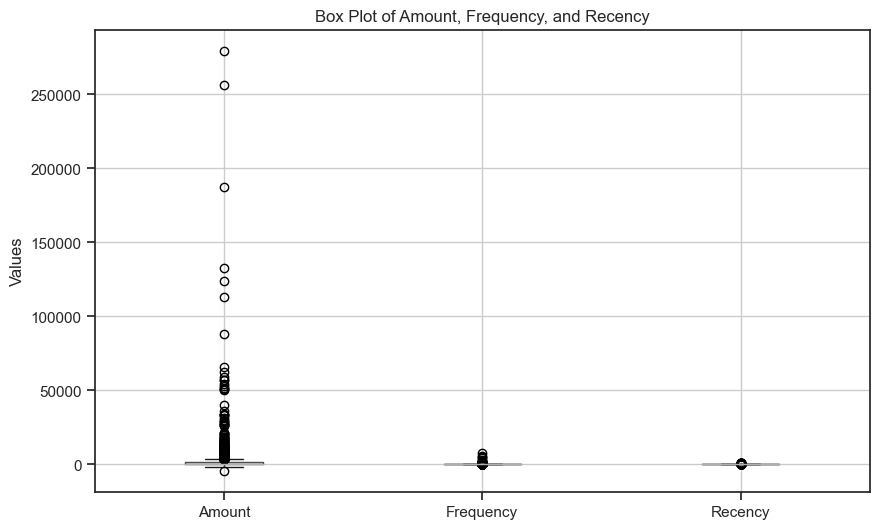

In [68]:
attributes = ['Amount', 'Frequency', 'Recency']
data = merged_df[attributes]

# Create a box plot with Plotly
plt.figure(figsize=(10, 6))
data.boxplot()
plt.title('Box Plot of Amount, Frequency, and Recency')
plt.ylabel('Values')
plt.show()


In [69]:

# Removing outliers for Amount
Q1 = merged_df.Amount.quantile(0.05)
Q3 = merged_df.Amount.quantile(0.95)
IQR = Q3 - Q1
merged_df = merged_df[(merged_df.Amount >= Q1 - 1.5*IQR) & (merged_df.Amount <= Q3 + 1.5*IQR)]



# Removing outliers for Recency
Q1 = merged_df.Recency.quantile(0.05)
Q3 = merged_df.Recency.quantile(0.95)
IQR = Q3 - Q1
merged_df = merged_df[(merged_df.Recency >= Q1 - 1.5*IQR) & (merged_df.Recency <= Q3 + 1.5*IQR)]

# Removing outliers for Frequency
Q1 = merged_df.Frequency.quantile(0.05)
Q3 = merged_df.Frequency.quantile(0.95)
IQR = Q3 - Q1
merged_df = merged_df[(merged_df.Frequency >= Q1 - 1.5*IQR) & (merged_df.Frequency <= Q3 + 1.5*IQR)]

Let's create box plot now and see

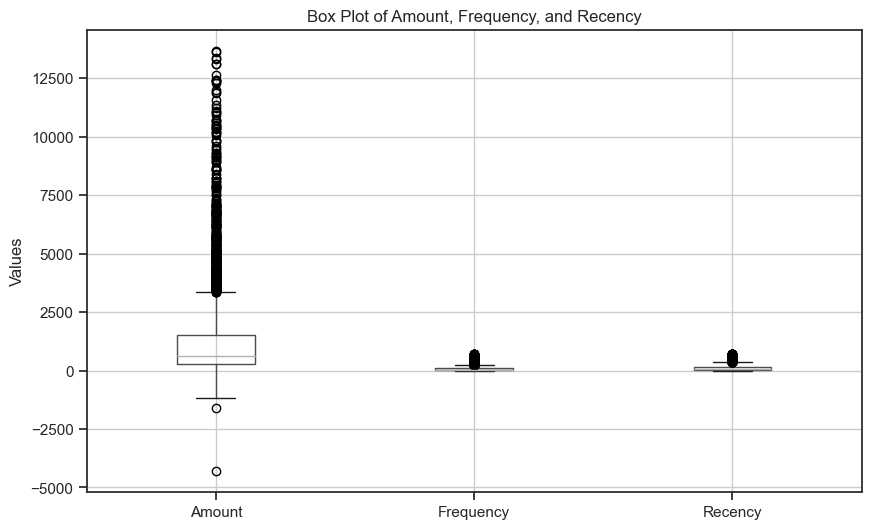

In [70]:
attributes = ['Amount', 'Frequency', 'Recency']
data = merged_df[attributes]

# Create a box plot with Plotly
plt.figure(figsize=(10, 6))
data.boxplot()
plt.title('Box Plot of Amount, Frequency, and Recency')
plt.ylabel('Values')
plt.show()

We can see that outliers have been successfully removed.

### 7. Rescaling the Attributes
Here, we will use Standardisation Scaling.

In [71]:
merged_df = merged_df[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(merged_df)
rfm_df_scaled.shape

(4293, 3)

In [72]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,1.954651
1,1.731617,1.042467,-0.546982
2,0.300128,-0.463636,-0.232091
3,0.277517,-0.044720,-0.730668
4,-0.533235,-0.603275,1.823447


# Building the Model


## K-Means Clustering

### 1. Let's create model

We will try different number of clusters and them use elbow plot to pick the optimum number of clusters.

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=2, the Elbow score is 7703.241143591407
For n_clusters=3, the Elbow score is 4922.070278485775
For n_clusters=4, the Elbow score is 3836.3145346920082


/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=5, the Elbow score is 3184.5826069651275
For n_clusters=6, the Elbow score is 2628.458772541023


/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=7, the Elbow score is 2269.4972338810667
For n_clusters=8, the Elbow score is 1974.2900213444432


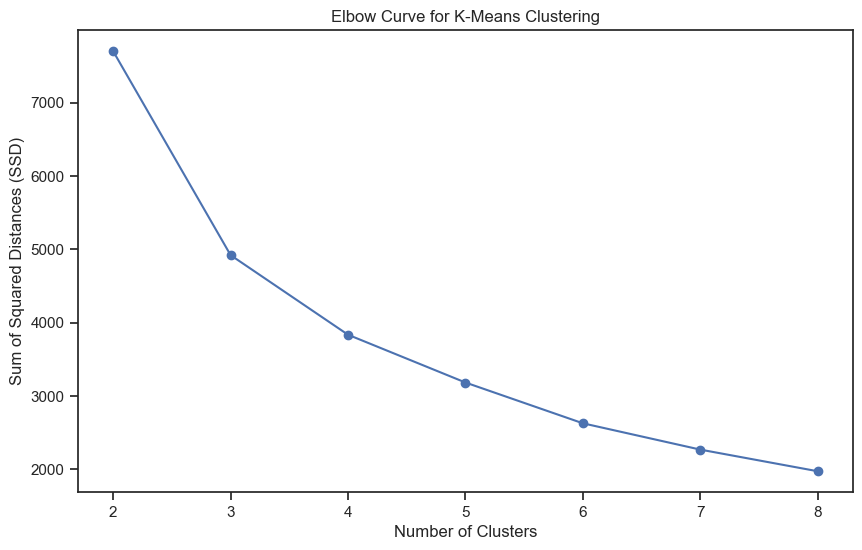

In [73]:
ssd = [] # Sum of Squared Distances
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# Assuming rfm_df_scaled is your scaled data
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    print("For n_clusters={0}, the Elbow score is {1}".format(num_clusters, kmeans.inertia_))

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, ssd, marker='o')
plt.title('Elbow Curve for K-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.show()

In [74]:
ssd

[7703.241143591407,
 4922.070278485775,
 3836.3145346920082,
 3184.5826069651275,
 2628.458772541023,
 2269.4972338810667,
 1974.2900213444432]

We can see that the elbow graph doesn't change much after 5 clusters. So we will segment our customers in 5 groups.

In [75]:
# Final model with k=5
n_clusters=5
kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(rfm_df_scaled)

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=5)

In [76]:
kmeans.labels_

array([3, 4, 1, ..., 1, 1, 1], dtype=int32)

In [77]:
# assign the label
merged_df['Cluster_Id'] = kmeans.labels_
merged_df.head()

,Amount,Frequency,Recency,Cluster_Id
0,0.00,2,326,3
1,4310.00,182,40,4
2,1797.24,31,76,1
3,1757.55,73,19,1
4,334.40,17,311,3


### 2. Box plot to visualize Cluster Id vs Amount, Frequency and Recency



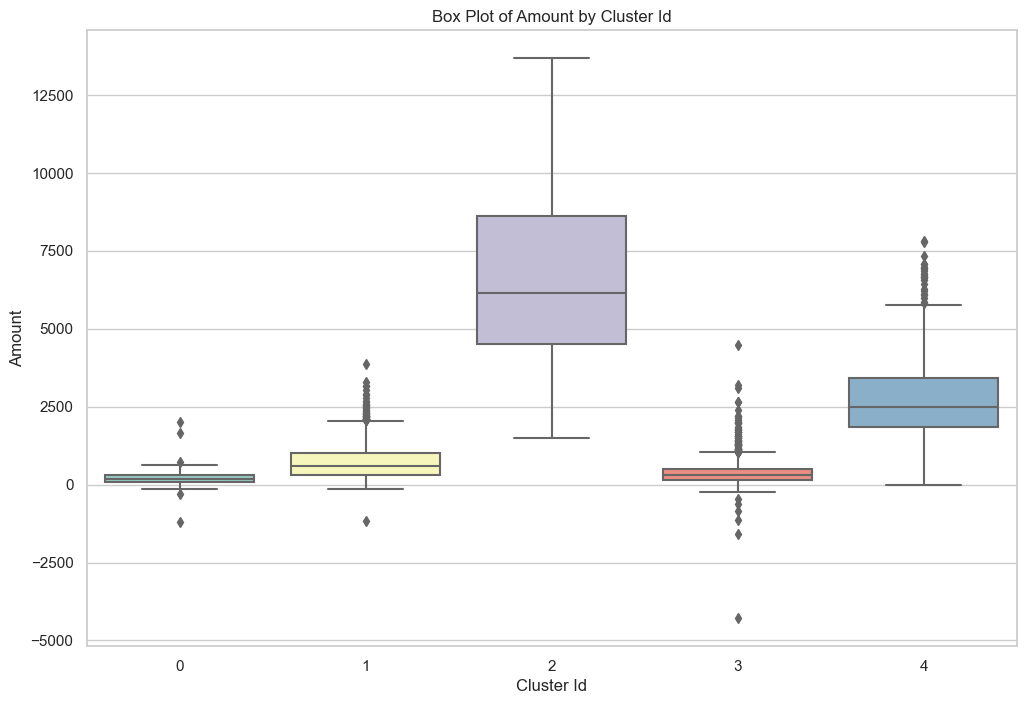

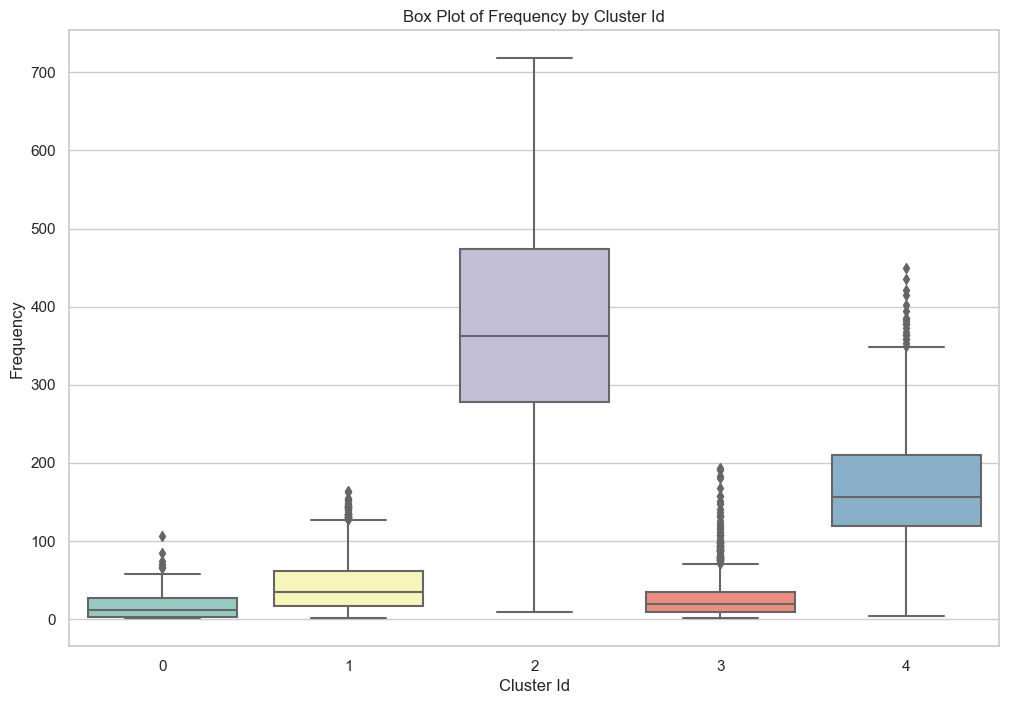

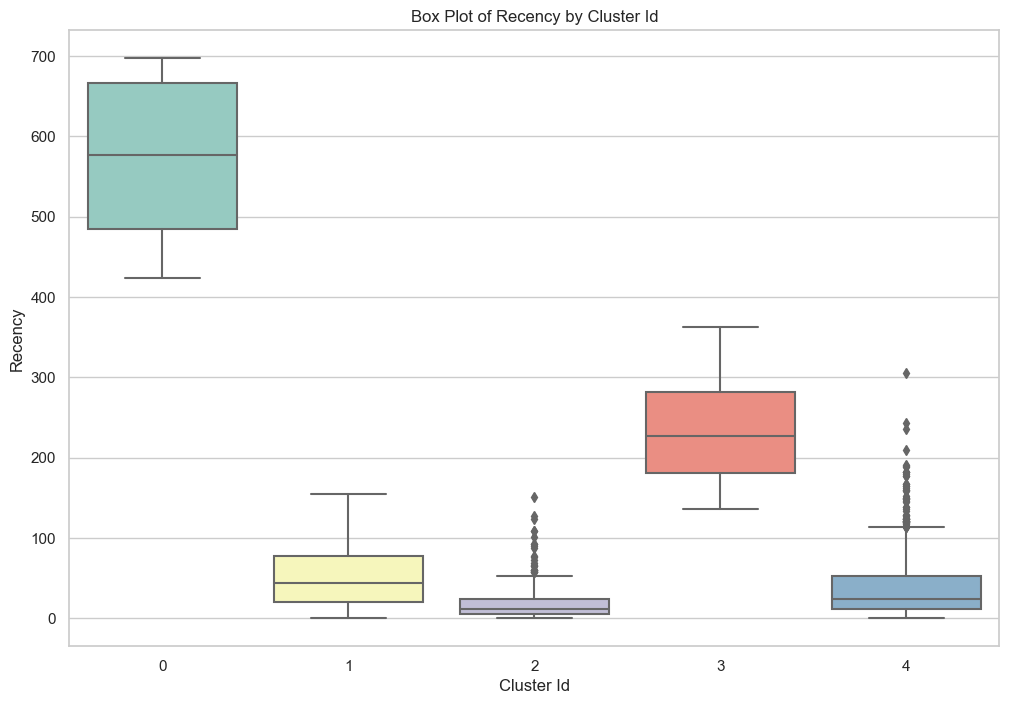

In [78]:

# Assuming data is your DataFrame
data = merged_df

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster_Id', y='Amount', data=data, palette='Set3')
plt.title('Box Plot of Amount by Cluster Id')
plt.xlabel('Cluster Id')
plt.ylabel('Amount')
plt.show()

# Create a box plot for Frequency
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster_Id', y='Frequency', data=data, palette='Set3')
plt.title('Box Plot of Frequency by Cluster Id')
plt.xlabel('Cluster Id')
plt.ylabel('Frequency')
plt.show()

# Create a box plot for Recency
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster_Id', y='Recency', data=data, palette='Set3')
plt.title('Box Plot of Recency by Cluster Id')
plt.xlabel('Cluster Id')
plt.ylabel('Recency')
plt.show()


/usr/local/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/site-packages/seaborn/axisgrid.py:1609: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/site-packages/seaborn/axisgrid.py:1609: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)


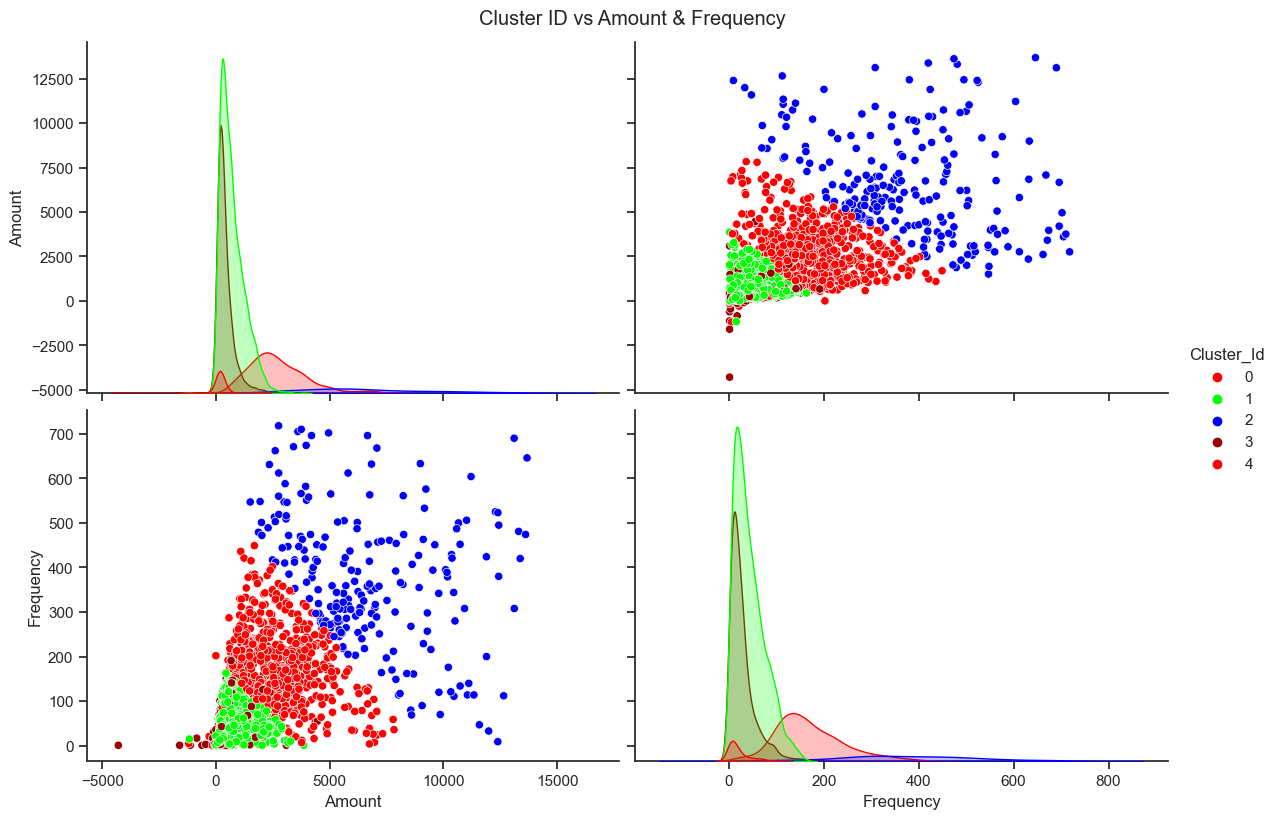

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a custom color palette with Red, Green, and Blue
custom_palette = sns.color_palette(["#FF0000", "#00FF00", "#0000FF", "#990000"])

# Create a scatter plot matrix with separate plots for each cluster, custom palette, and a larger size
sns.set(style="ticks")
sns.pairplot(merged_df, hue='Cluster_Id', vars=['Amount', 'Frequency'], palette=custom_palette, height=4, aspect=1.5)
plt.suptitle('Cluster ID vs Amount & Frequency', y=1.02)
plt.show()


### 3. Scatter plot matrix of cluster

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


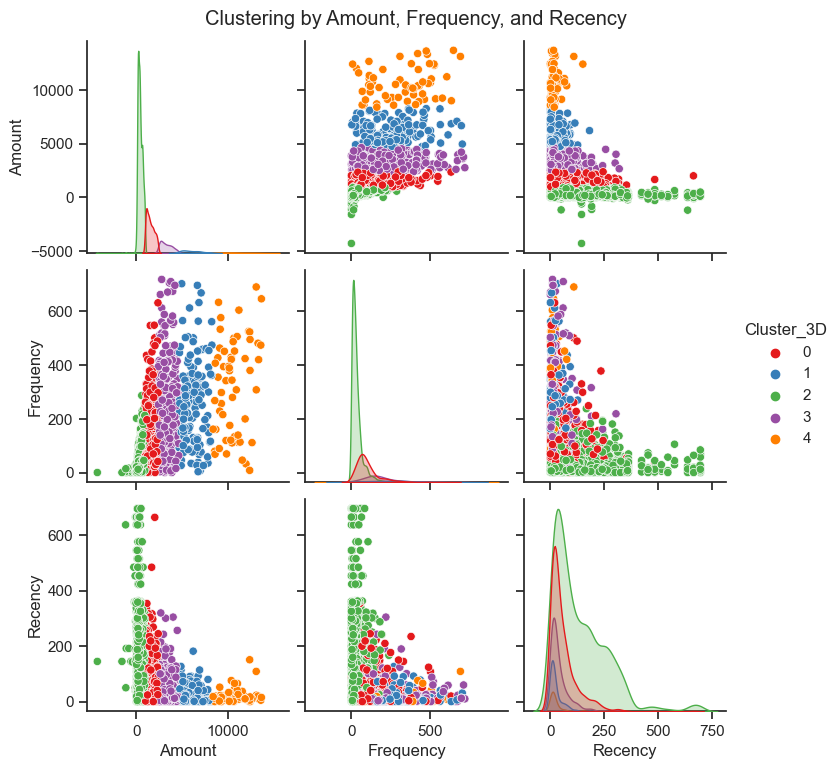

In [80]:
# Selecting the three features for clustering
data_for_clustering = merged_df[['Amount', 'Frequency', 'Recency']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters)
merged_df['Cluster_3D'] = kmeans.fit_predict(data_for_clustering)

# Visualize the clusters (scatter plot matrix)
sns.set(style="ticks")
sns.pairplot(merged_df, hue='Cluster_3D', vars=['Amount', 'Frequency', 'Recency'], palette='Set1')
plt.suptitle('Clustering by Amount, Frequency, and Recency', y=1.02)
plt.show()


## Hierarchical Clustering

### 1. Single linkage

Single linkage is a hierarchical clustering method that uses the minimum distance between two clusters as the linkage criterion.


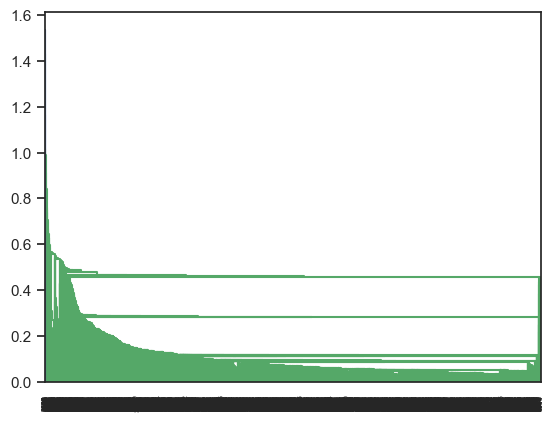

In [81]:
mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

It is not useful as we are not able to identify separate clusters. Let's use Compelte linkage.

### 2. Complete Linkage

Complete linkage is a hierarchical clustering method that measures the distance between two clusters based on the maximum distance between any two points in the clusters.

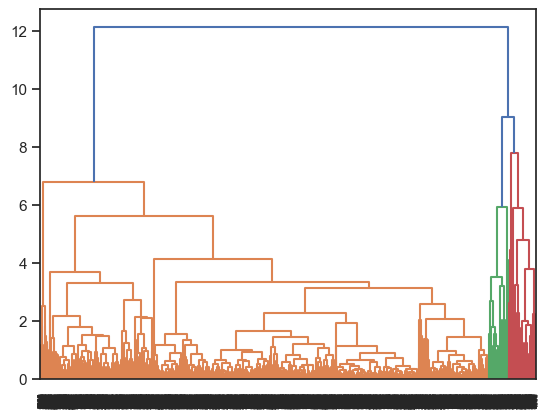

In [82]:
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

It's better but still it isn't very clear.

### 3. Average Linkage

Average linkage is a hierarchical clustering method that measures the distance between two clusters based on the average distance between all pairs of points in the clusters.

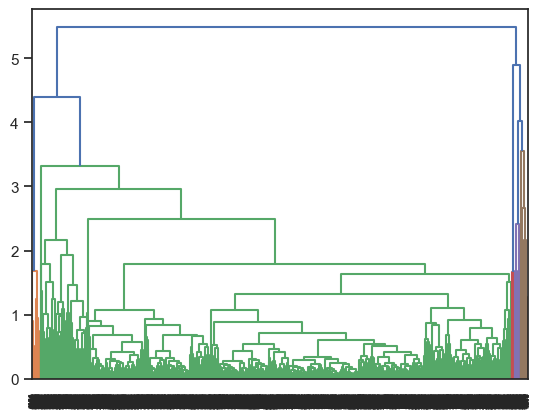

In [83]:
mergings = linkage(rfm_df_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

We can see that around 5 clusters are optimal here.

#### Cutting the Dendrogram based on K=5


In [84]:
cluster_labels = cut_tree(mergings, n_clusters=5).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
merged_df['Cluster_Labels'] = cluster_labels
merged_df.head()

,Amount,Frequency,Recency,Cluster_Id,Cluster_3D,Cluster_Labels
0,0.00,2,326,3,2,0
1,4310.00,182,40,4,3,0
2,1797.24,31,76,1,0,0
3,1757.55,73,19,1,0,0
4,334.40,17,311,3,2,0


### 4. Scatter plot matrix of cluster

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


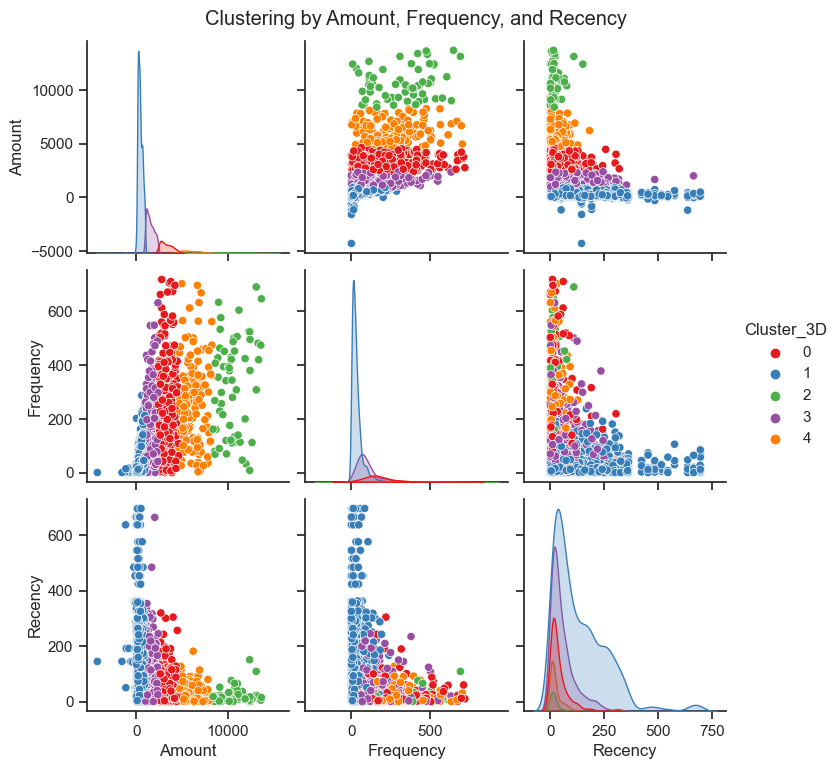

In [86]:
# Selecting the three features for clustering
data_for_clustering = merged_df[['Amount', 'Frequency', 'Recency']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters)
merged_df['Cluster_3D'] = kmeans.fit_predict(data_for_clustering)

# Visualize the clusters (scatter plot matrix)
sns.set(style="ticks")
sns.pairplot(merged_df, hue='Cluster_3D', vars=['Amount', 'Frequency', 'Recency'], palette='Set1')
plt.suptitle('Clustering by Amount, Frequency, and Recency', y=1.02)
plt.show()


## Conclusion


Overall both model performed well but K-Means clustering performed better due to:
- Simplicity and Efficiency: K-Means is computationally efficient, easy to implement, and suitable for large datasets, making it ideal for real-time applications.

- Scalability: The algorithm handles high-dimensional data well and scales effectively, providing versatility for various applications.

- Ease of Interpretation: K-Means results are straightforward to interpret, with clear cluster assignments and centroids representing cluster characteristics.

- Applicability to Different Data Types: Versatile application to both numerical and categorical data after suitable preprocessing, making it adaptable to diverse datasets.

- Versatility in Cluster Shape: Performs well with roughly spherical clusters and effectively identifies clusters in scenarios with non-spherical shapes.

### GitHub Link:

https://github.com/arunattri26/MSDS/tree/main/DTSA_5510_Unsupervised_Learning